In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetching the Obesity dataset
obesity_df = pd.read_csv('./data/Obesity Classification.csv')
obesity_df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [3]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
obesity_df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

### Descriptive Statistics

In [5]:
# Calculate basic descriptive statistics (mean, median, standard deviation) for the 'Age', 'Height', 'Weight', and 'BMI' columns.
obesity_df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


### Gender Analysis

<Axes: xlabel='Gender', ylabel='Count'>

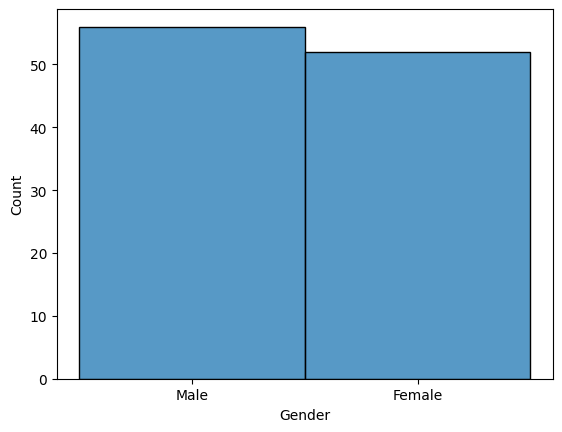

In [6]:
# Explore the distribution of genders in the dataset using a bar plot or pie chart.
sns.histplot(data=obesity_df, x='Gender')

<Axes: >

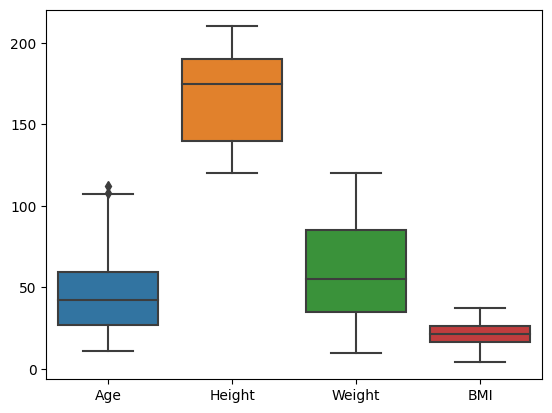

In [7]:
# Compare the average age, height, weight, and BMI between different genders using box plots or violin plots.
sns.boxplot(data=obesity_df[['Age', 'Height', 'Weight', 'BMI']])

<Axes: >

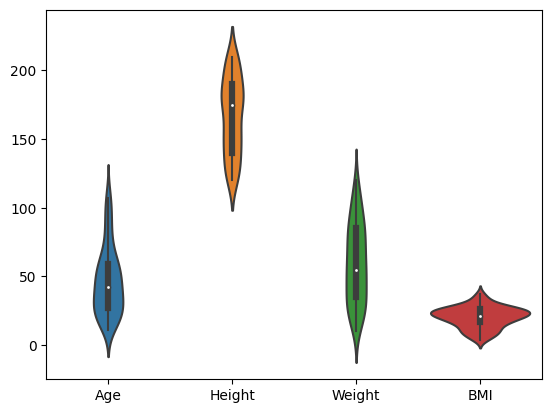

In [8]:
sns.violinplot(data=obesity_df[['Age', 'Height', 'Weight', 'BMI']])

<Axes: xlabel='Label', ylabel='count'>

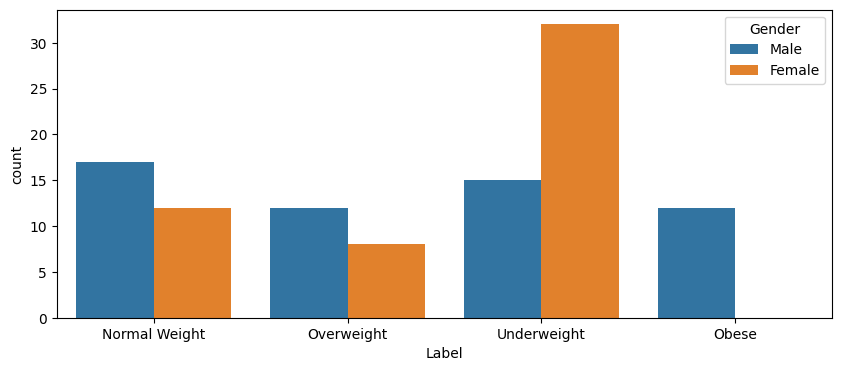

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(data=obesity_df, x='Label', hue='Gender')

In [10]:
# Calculate the percentage of males and females in different BMI categories (underweight, normal weight, overweight, obese).
obesity_df.groupby('Label')['Gender'].value_counts()

Label          Gender
Normal Weight  Male      17
               Female    12
Obese          Male      12
Overweight     Male      12
               Female     8
Underweight    Female    32
               Male      15
Name: count, dtype: int64

In [11]:
obesity_df[obesity_df['Label'] == 'Obese']

,ID,Age,Gender,Height,Weight,BMI,Label
4,5,45,Male,190,100,31.2,Obese
6,7,55,Male,200,110,34.2,Obese
8,9,65,Male,210,120,37.2,Obese
16,17,48,Male,200,100,31.2,Obese
18,20,58,Male,210,110,34.2,Obese
24,26,88,Male,190,100,31.2,Obese
26,28,98,Male,200,110,34.2,Obese
28,30,108,Male,210,120,37.2,Obese
34,37,49,Male,200,105,28.9,Obese
36,39,59,Male,210,115,30.8,Obese


### Age Analysis

In [12]:
# Create age groups (e.g., 0-20, 21-40, 41-60, 61+) and analyze the distribution of individuals within each group using a histogram.
def age_cato(age):
    if (age <= 20):
        return '0-20'
    elif (age > 20 and age <= 40):
        return '21-40'
    elif (age > 40 and age <= 60):
        return '41-60'
    else:
        return '61+'
    
obesity_df['Age_cat'] = obesity_df['Age'].apply(age_cato)
obesity_df.head()

,ID,Age,Gender,Height,Weight,BMI,Label,Age_cat
0,1,25,Male,175,80,25.3,Normal Weight,21-40
1,2,30,Female,160,60,22.5,Normal Weight,21-40
2,3,35,Male,180,90,27.3,Overweight,21-40
3,4,40,Female,150,50,20.0,Underweight,21-40
4,5,45,Male,190,100,31.2,Obese,41-60


<Axes: xlabel='Age_cat', ylabel='Count'>

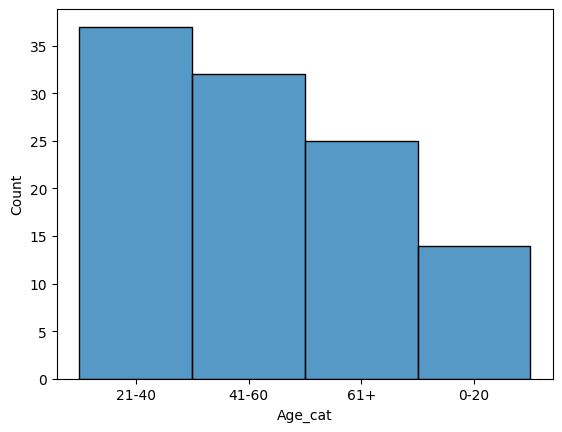

In [13]:
sns.histplot(data=obesity_df, x='Age_cat')

<Axes: xlabel='Height', ylabel='Age_cat'>

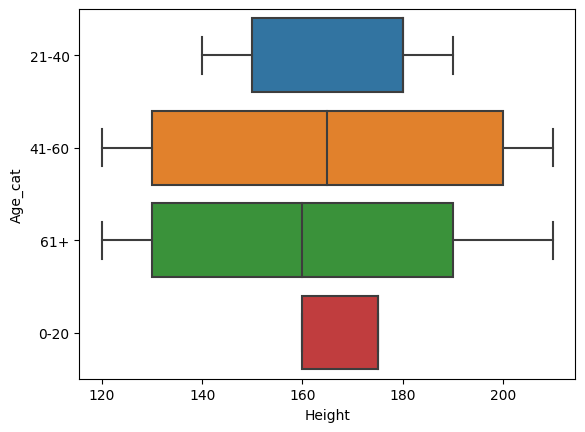

In [14]:
# Compare the average height, weight, and BMI across different age groups using box plots or line plots.
sns.boxplot(data=obesity_df, x='Height', y='Age_cat')

<Axes: xlabel='Weight', ylabel='Age_cat'>

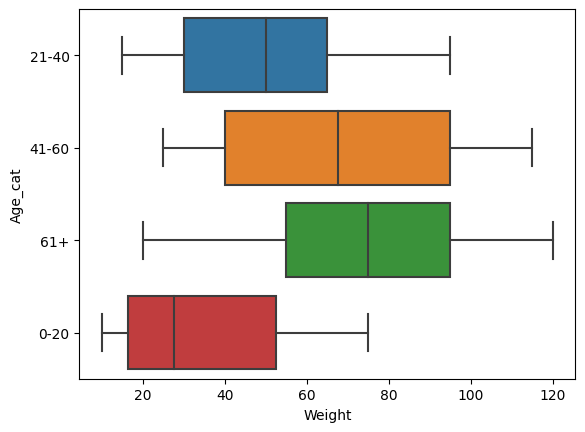

In [15]:
sns.boxplot(data=obesity_df, x='Weight', y='Age_cat')

<Axes: xlabel='BMI', ylabel='Age_cat'>

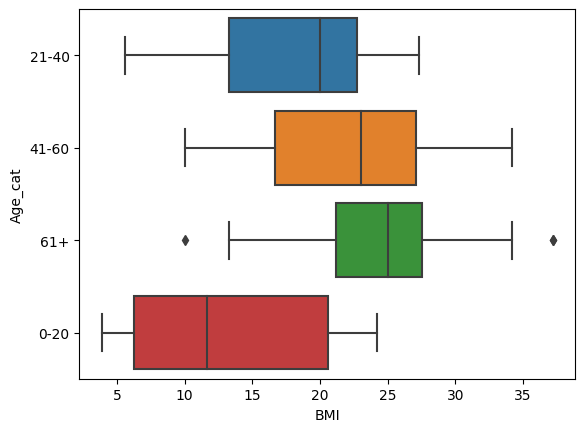

In [16]:
sns.boxplot(data=obesity_df, x='BMI', y='Age_cat')

### BMI Analysis

<Axes: xlabel='BMI', ylabel='Count'>

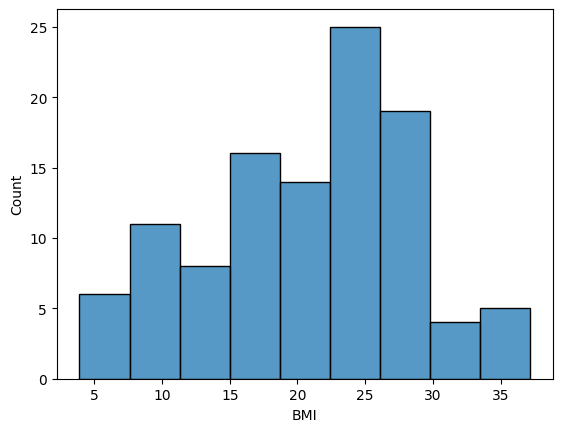

In [17]:
# Analyze the distribution of BMI values using a histogram or density plot.
sns.histplot(data=obesity_df, x='BMI')

<Axes: xlabel='Label', ylabel='count'>

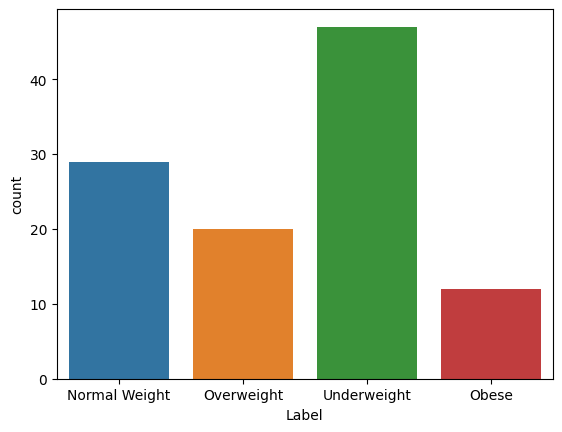

In [18]:
# Calculate the percentage of individuals falling into different BMI categories (underweight, normal weight, overweight, obese) and visualize it using a pie chart or bar plot.
sns.countplot(data=obesity_df, x='Label')

### Height and Weight Analysis

In [19]:
obesity_df['Weight_Lbs'] = obesity_df['Weight'].apply(lambda weight: round(weight * 2.2))
obesity_df.head()

,ID,Age,Gender,Height,Weight,BMI,Label,Age_cat,Weight_Lbs
0,1,25,Male,175,80,25.3,Normal Weight,21-40,176
1,2,30,Female,160,60,22.5,Normal Weight,21-40,132
2,3,35,Male,180,90,27.3,Overweight,21-40,198
3,4,40,Female,150,50,20.0,Underweight,21-40,110
4,5,45,Male,190,100,31.2,Obese,41-60,220


<Axes: xlabel='Weight_Lbs', ylabel='Height'>

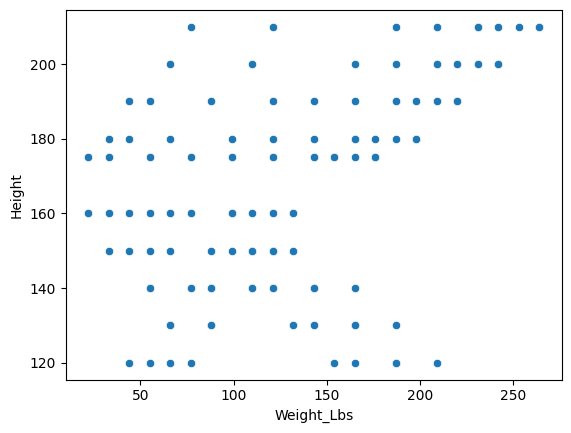

In [20]:
# Explore the relationship between height and weight using a scatter plot.
sns.scatterplot(data=obesity_df, x='Weight_Lbs', y='Height')

In [21]:
# Calculate the correlation coefficient between height and weight to determine the strength of their relationship.

In [22]:
# Calculate the correlation coefficient between height and weight to determine the strength of their relationship.

### Label Analysis

<Axes: xlabel='Label', ylabel='count'>

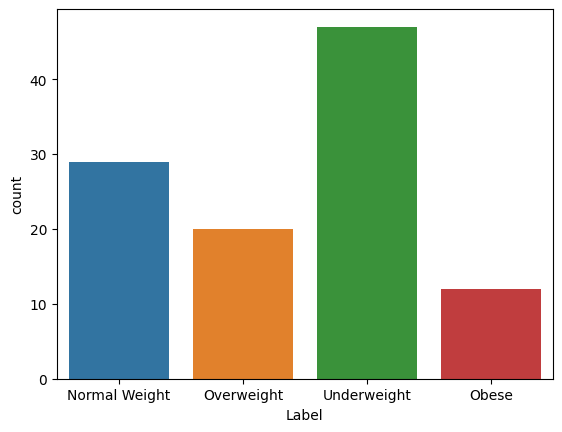

In [26]:
# Examine the distribution of labels in the 'Label' column and visualize it using a bar plot.
sns.countplot(data=obesity_df, x='Label')

In [27]:
# Perform a count analysis to see how many individuals fall into each label category.
obesity_df.groupby('Label')['Label'].value_counts()

Label
Normal Weight    29
Obese            12
Overweight       20
Underweight      47
Name: count, dtype: int64

### Combined Analysis

In [ ]:
# Analyze the relationship between age, gender, and label. For example, determine the average age of individuals in each label category based on gender.